In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the csv file 
data = pd.read_csv("Cardiotocographic.csv")
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
data.shape

(2126, 14)

### 1. Data Cleaning and preparation


In [6]:
#missing values
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
#filling all the missing values with the median 
data["LB"] = data["LB"].fillna(data["LB"].median())
data["AC"] = data["AC"].fillna(data["AC"].median())
data["DS"] = data["DS"].fillna(data["DS"].median())
data["DP"] = data["DP"].fillna(data["DP"].median())
data["MLTV"] = data["MLTV"].fillna(data["MLTV"].median())
data["Width"] = data["Width"].fillna(data["Width"].median())
data["Tendency"] = data["Tendency"].fillna(data["Tendency"].median())
data["NSP"] = data["NSP"].fillna(data["NSP"].median())

In [8]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2114 non-null   float64
 1   AC        2114 non-null   float64
 2   FM        2114 non-null   float64
 3   UC        2114 non-null   float64
 4   DL        2114 non-null   float64
 5   DS        2114 non-null   float64
 6   DP        2114 non-null   float64
 7   ASTV      2114 non-null   float64
 8   MSTV      2114 non-null   float64
 9   ALTV      2114 non-null   float64
 10  MLTV      2114 non-null   float64
 11  Width     2114 non-null   float64
 12  Tendency  2114 non-null   float64
 13  NSP       2114 non-null   float64
dtypes: float64(14)
memory usage: 247.7 KB


In [9]:
#check the duplicates in the data
data.duplicated().sum()

2

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


rounding of the data coulumns to 4 decimals

In [13]:
#rounding to 2 decimals of the data in dataset
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [14]:
data=data[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP']].round(2)

In [15]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.00,0.00,0.00,0.00,0.0,0.0,0.0,73.0,0.5,43.00,2.4,64.0,1.0,2.00
1,132.00,0.01,0.00,0.01,0.0,0.0,0.0,17.0,2.1,0.00,10.4,130.0,0.0,1.00
2,133.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.1,0.00,13.4,130.0,0.0,1.00
3,134.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,23.0,117.0,1.0,1.00
4,131.95,0.01,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,19.9,117.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.00,0.00,0.96,0.01,0.0,0.0,0.0,79.0,0.2,25.00,7.2,40.0,0.0,2.00
2122,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,22.00,7.1,66.0,1.0,2.00
2123,140.00,0.00,0.00,0.01,0.0,0.0,0.0,79.0,0.4,20.00,6.1,67.0,1.0,1.99
2124,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,27.00,7.0,66.0,1.0,2.00


In [16]:
#finding outliers

<function matplotlib.pyplot.show(close=None, block=None)>

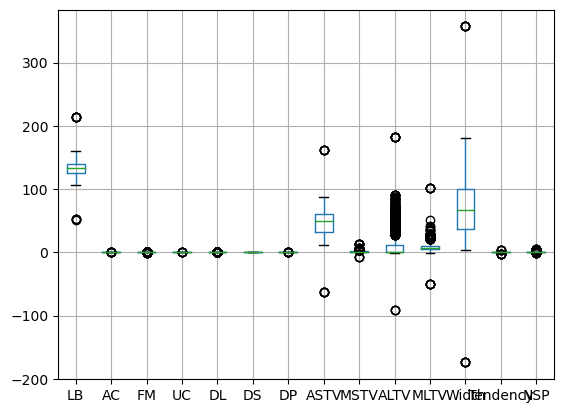

In [17]:
data.boxplot()
plt.show

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

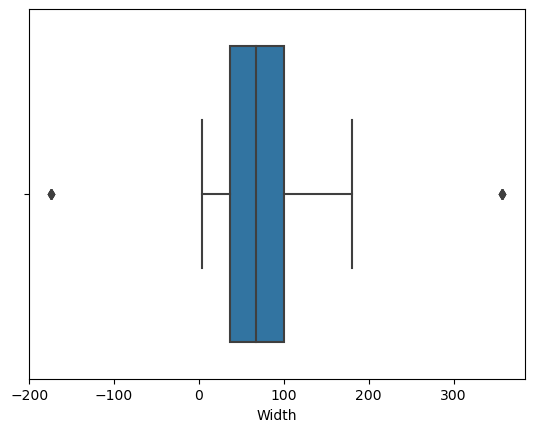

In [18]:
sns.boxplot(data["Width"])

In [19]:
Q3 = data["Width"].quantile(0.75)
Q1 = data["Width"].quantile(0.25)
IQR = Q3-Q1
lowerextreme = Q1-1.5*IQR
upperextreme = Q3+1.5*IQR
print(lowerextreme
,upperextreme)

-57.5 194.5


In [20]:
outliers=data[(data.Width< lowerextreme) | (data.Width > upperextreme)]
remove = outliers["LB"].index

In [21]:
remove 

Index([54, 64, 120, 389, 704, 829, 860, 1096, 1273, 1320], dtype='int64')

In [22]:
data.drop(remove,inplace=True)

In [23]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.00,0.00,0.00,0.00,0.0,0.0,0.0,73.0,0.5,43.00,2.4,64.0,1.0,2.00
1,132.00,0.01,0.00,0.01,0.0,0.0,0.0,17.0,2.1,0.00,10.4,130.0,0.0,1.00
2,133.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.1,0.00,13.4,130.0,0.0,1.00
3,134.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,23.0,117.0,1.0,1.00
4,131.95,0.01,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,19.9,117.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.00,0.00,0.96,0.01,0.0,0.0,0.0,79.0,0.2,25.00,7.2,40.0,0.0,2.00
2122,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,22.00,7.1,66.0,1.0,2.00
2123,140.00,0.00,0.00,0.01,0.0,0.0,0.0,79.0,0.4,20.00,6.1,67.0,1.0,1.99
2124,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,27.00,7.0,66.0,1.0,2.00


<AxesSubplot:>

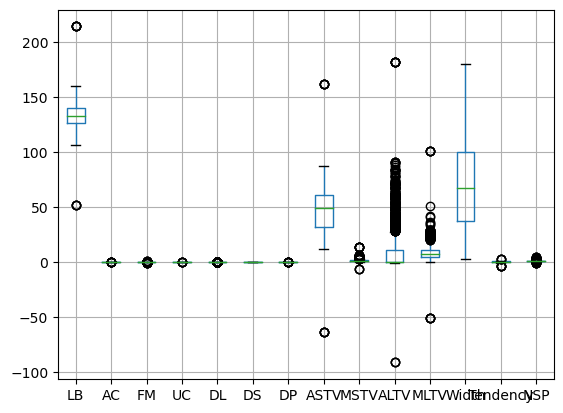

In [24]:
data.boxplot()

### 3.Statistical Summary


In [48]:
#describe is a inbult method does all the statistical summary of measures of central tendncy and standard deviation of the data
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.0,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000
mean,133.339844,0.002909,0.009532,0.004333,0.001594,0.0,0.000009,47.036656,1.365071,10.269522,8.277611,70.327162,0.313609,1.301325
std,11.211558,0.005176,0.067373,0.005162,0.004042,0.0,0.000688,18.801183,1.175806,21.185248,7.748477,38.712154,0.643431,0.641497
min,51.840000,-0.020000,-0.480000,-0.010000,-0.020000,0.0,-0.010000,-63.000000,-6.600000,-91.000000,-50.700000,3.000000,-3.000000,-1.030000
25%,126.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.010000,0.000000,0.010000,0.000000,0.0,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.040000,0.960000,0.030000,0.030000,0.0,0.010000,162.000000,13.800000,182.000000,101.400000,180.000000,3.000000,5.000000


observation: the coulumn Tendency and NSP have a simple level of statistical values where the data is differenty correlate.

###  Data Visualization and Pattern Recognition and Insights

In [25]:
#correlation and covariance

In [26]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.00,0.00,0.00,0.00,0.0,0.0,0.0,73.0,0.5,43.00,2.4,64.0,1.0,2.00
1,132.00,0.01,0.00,0.01,0.0,0.0,0.0,17.0,2.1,0.00,10.4,130.0,0.0,1.00
2,133.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.1,0.00,13.4,130.0,0.0,1.00
3,134.00,0.00,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,23.0,117.0,1.0,1.00
4,131.95,0.01,0.00,0.01,0.0,0.0,0.0,16.0,2.4,0.00,19.9,117.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.00,0.00,0.96,0.01,0.0,0.0,0.0,79.0,0.2,25.00,7.2,40.0,0.0,2.00
2122,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,22.00,7.1,66.0,1.0,2.00
2123,140.00,0.00,0.00,0.01,0.0,0.0,0.0,79.0,0.4,20.00,6.1,67.0,1.0,1.99
2124,140.00,0.00,0.00,0.01,0.0,0.0,0.0,78.0,0.4,27.00,7.0,66.0,1.0,2.00


In [33]:
corr = data[["LB","UC"]].corr()
corr

,LB,UC
LB,1.00000,-0.13231
UC,-0.13231,1.00000


<AxesSubplot:>

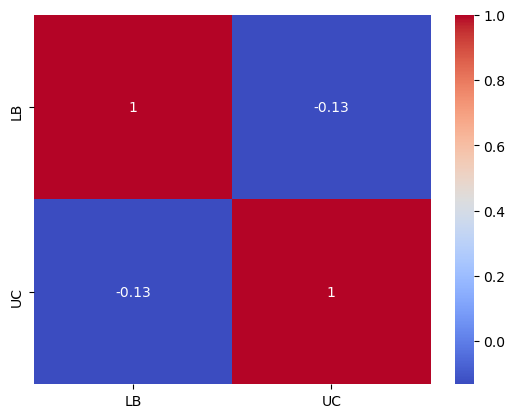

In [35]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

Observation:where LB stands for "Baseline fetal heart rate " and UC stands for "Uterine Constactions"
well there is a correlation between the fetal heart rate and uterine constaction,
if the averate fetal heart rate depends on the Uterine constract which can impact the fetal heart rate(LB)

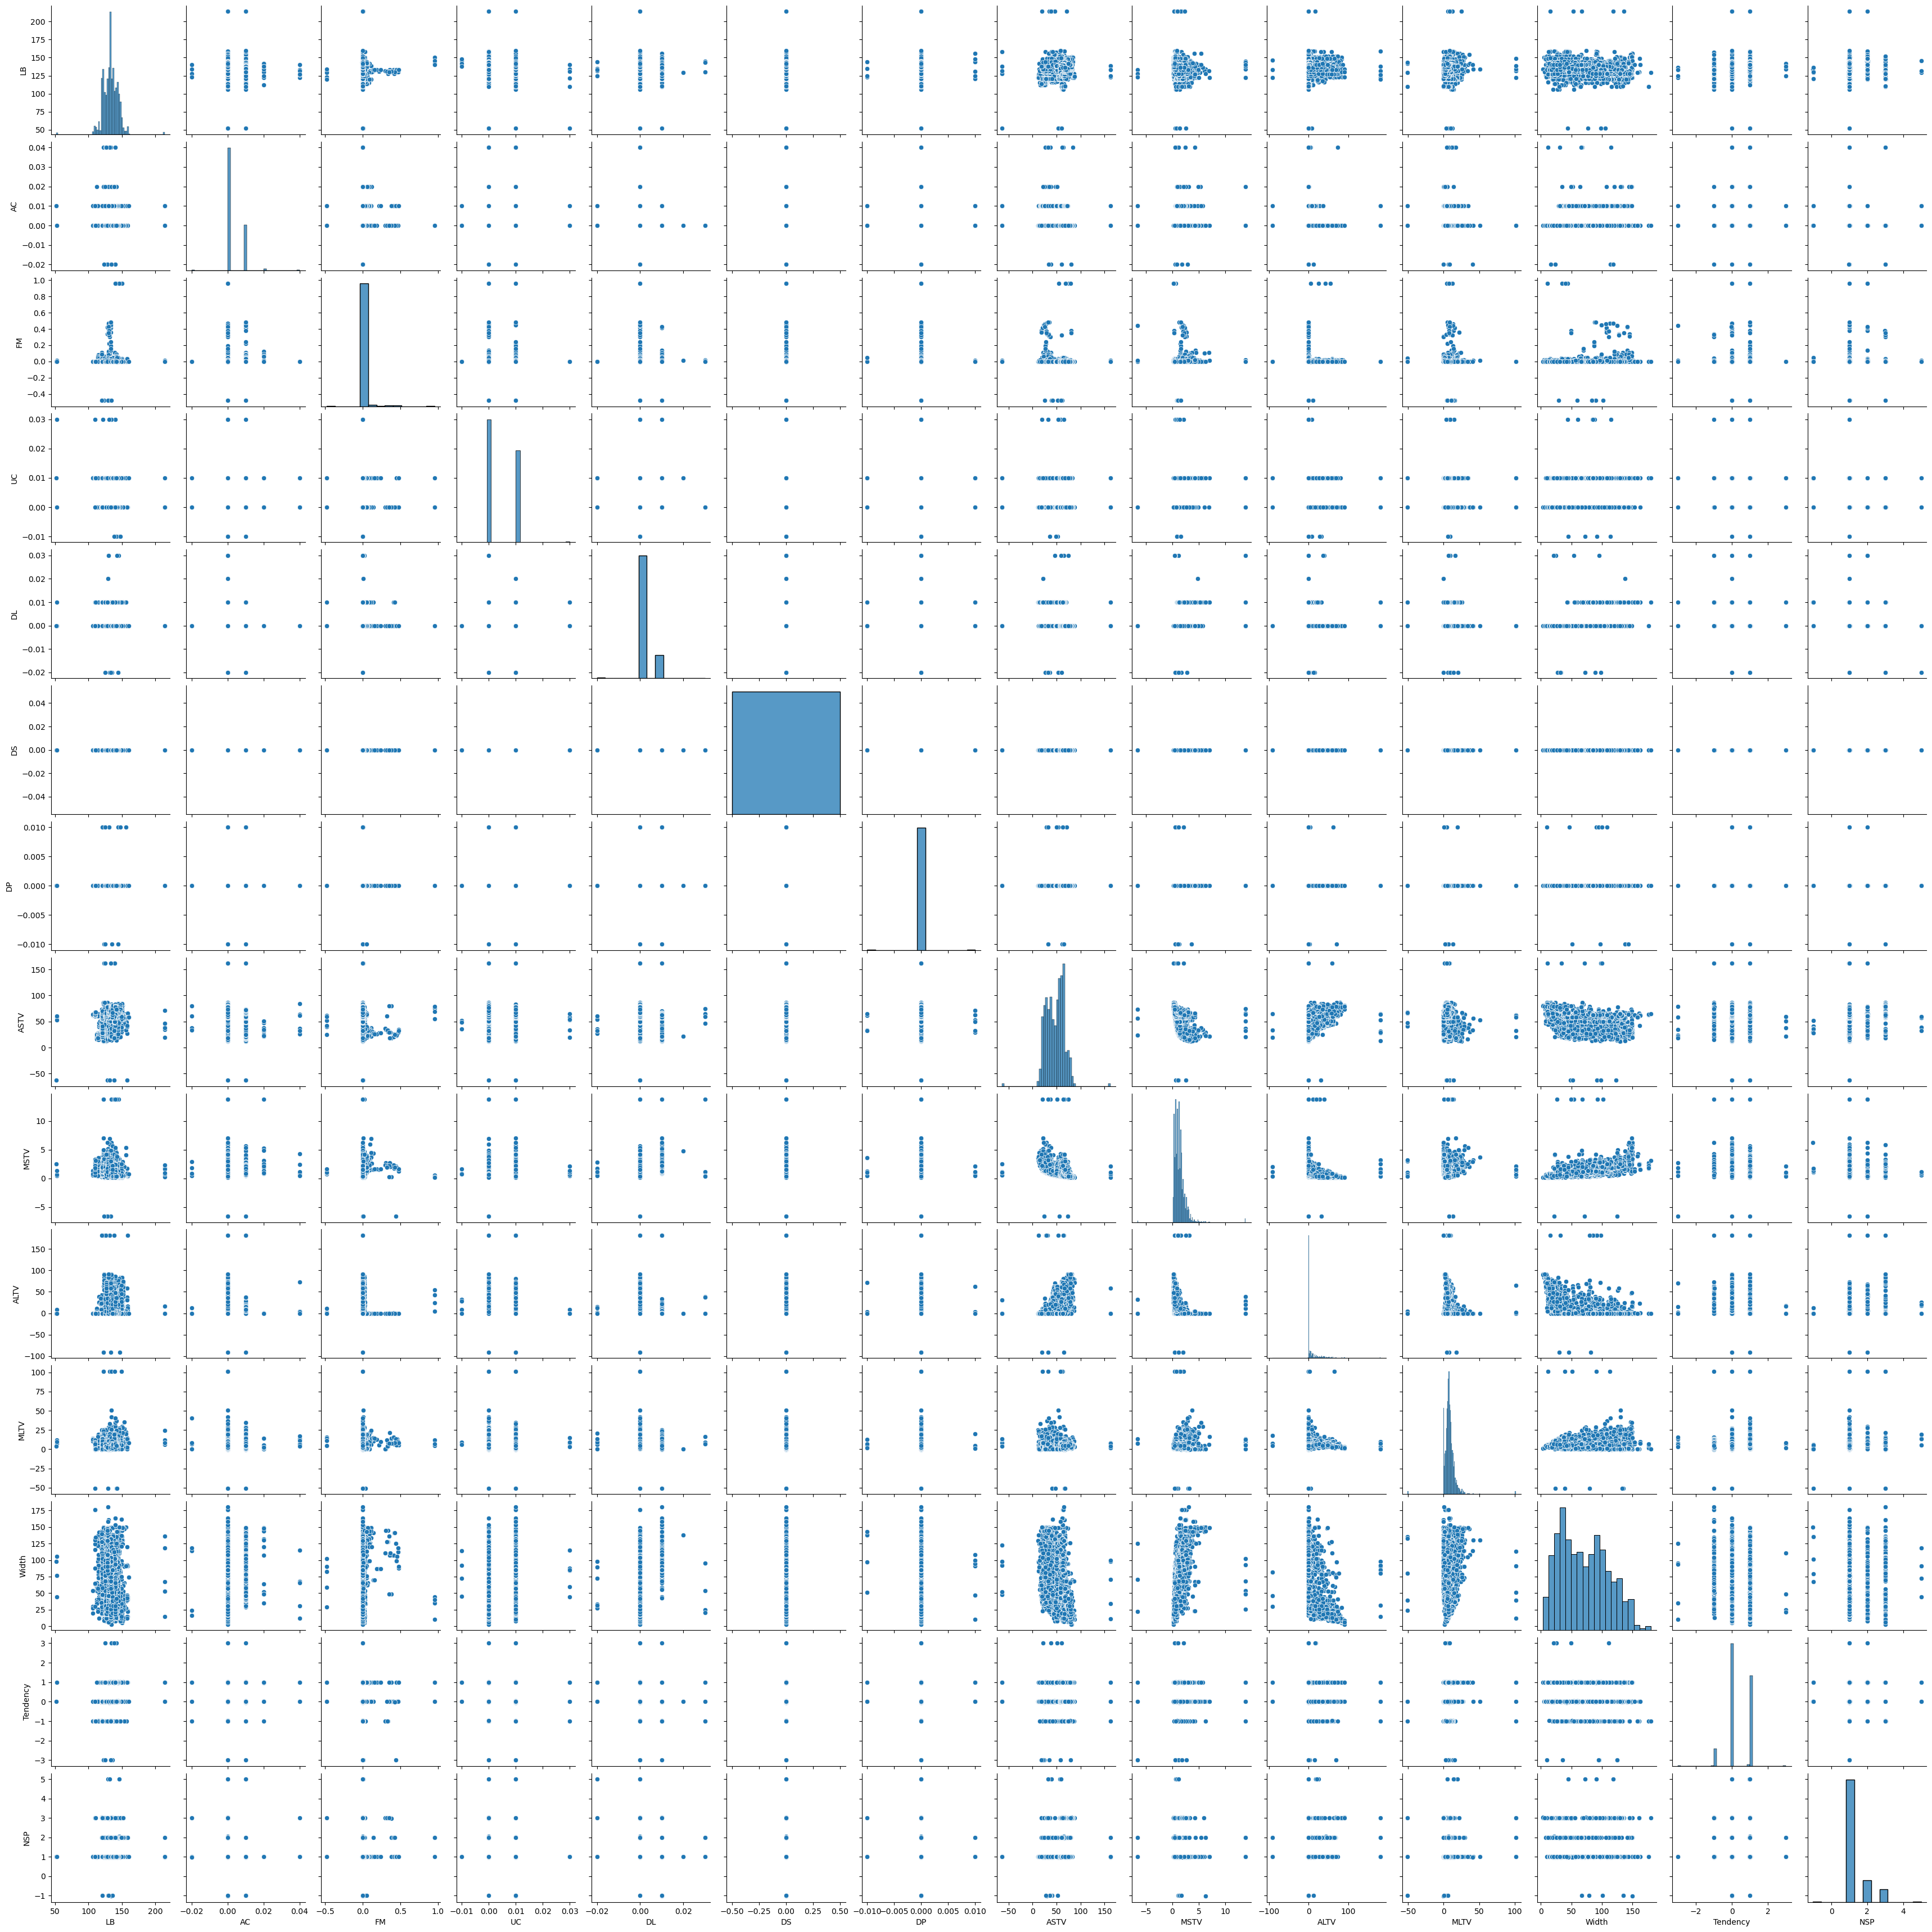

In [49]:
sns.pairplot(data)
plt.show()

<AxesSubplot:ylabel='Count'>

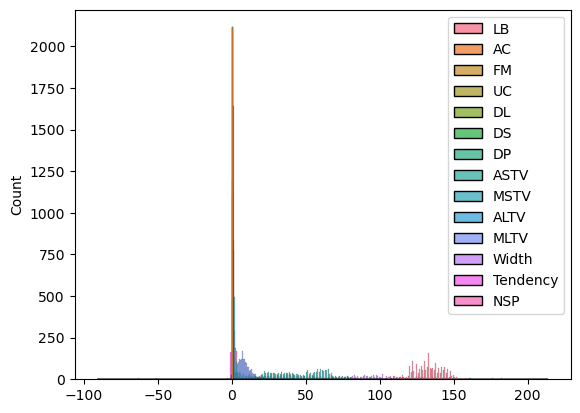

In [42]:
sns.histplot(data)

array([[<AxesSubplot:title={'center':'LB'}>,
        <AxesSubplot:title={'center':'AC'}>,
        <AxesSubplot:title={'center':'FM'}>,
        <AxesSubplot:title={'center':'UC'}>],
       [<AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'DS'}>,
        <AxesSubplot:title={'center':'DP'}>,
        <AxesSubplot:title={'center':'ASTV'}>],
       [<AxesSubplot:title={'center':'MSTV'}>,
        <AxesSubplot:title={'center':'ALTV'}>,
        <AxesSubplot:title={'center':'MLTV'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Tendency'}>,
        <AxesSubplot:title={'center':'NSP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

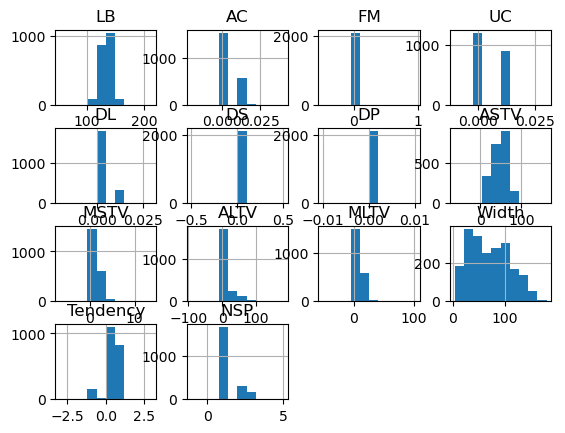

In [43]:
data.hist()

Observation: from the above diagrams we can say that the data is not normally distibuted and have a high kurtosis in each column

### Conclusion

from the above Exploratory Data Analysis we have cleaned and preprocessed the data with the median of the data and cleared the outliers as the data is fully numericals(float64) there were no categorical columns
the data of a cardiographic helps us to find the internal insights and patterns 
the data is now fully cleaned and can be used to ML models 
